# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 16.9MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [4]:
import pandas as pd

In [9]:
data= pd.read_csv('/content/Traffic Data.csv')

In [10]:
data

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


In [70]:
data.isna().sum()

,0
level_0,0
index,0
date_time,0
traffic_volume,0
prev_traffic_volume,0
traffic_volume_diff,0
day_of_week,0
month,0
day_of_year,0


In [71]:
data.duplicated

<bound method DataFrame.duplicated of        level_0  index           date_time  traffic_volume  \
1            4      4 2016-11-18 16:00:00          5074.0   
2            5      5 2016-11-18 16:00:00          5074.0   
3            6      6 2016-11-18 17:00:00          4328.0   
4            7      7 2016-11-18 17:00:00          4328.0   
5            8      8 2016-11-18 17:00:00          4328.0   
...        ...    ...                 ...             ...   
19992    19995  19995 2018-09-30 19:00:00          3543.0   
19993    19996  19996 2018-09-30 20:00:00          2781.0   
19994    19997  19997 2018-09-30 21:00:00          2159.0   
19995    19998  19998 2018-09-30 22:00:00          1450.0   
19996    19999  19999 2018-09-30 23:00:00           954.0   

       prev_traffic_volume  traffic_volume_diff  day_of_week  month  \
1                   5074.0                  0.0            4     11   
2                   5074.0                  0.0            4     11   
3                   5074.0               -746.0            4     11   
4                   4328.0                  0.0            4     11   
5                   4328.0                  0.0            4     11   
...                    ...                  ...          ...    ...   
19992               3947.0               -404.0            6      9   
19993               3543.0               -762.0            6      9   
19994               2781.0               -622.0            6      9   
19995               2159.0               -709.0            6      9   
19996               1450.0               -496.0            6      9   

       day_of_year  
1              323  
2              323  
3              323  
4              323  
5              323  
...            ...  
19992          273  
19993          273  
19994          273  
19995          273  
19996          273  

[19996 rows x 9 columns]>

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19996 entries, 1 to 19996
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   level_0              19996 non-null  int64         
 1   index                19996 non-null  int64         
 2   date_time            19996 non-null  datetime64[ns]
 3   traffic_volume       19996 non-null  float64       
 4   prev_traffic_volume  19996 non-null  float64       
 5   traffic_volume_diff  19996 non-null  float64       
 6   day_of_week          19996 non-null  int32         
 7   month                19996 non-null  int32         
 8   day_of_year          19996 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(2)
memory usage: 1.3 MB


In [73]:
data.describe()

,level_0,index,date_time,traffic_volume,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
count,19996.000000,19996.000000,19996,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000
mean,10001.500000,10001.500000,2017-10-22 05:50:31.806361344,3277.762452,3277.968494,-0.206041,2.972545,6.287057,176.064513
min,4.000000,4.000000,2016-11-18 16:00:00,113.000000,113.000000,-10061.000000,0.000000,1.000000,1.000000
25%,5002.750000,5002.750000,2017-04-30 17:45:00,1228.000000,1228.750000,-404.000000,1.000000,3.000000,88.000000
50%,10001.500000,10001.500000,2017-10-21 08:00:00,3428.000000,3429.000000,0.000000,3.000000,6.000000,172.000000
75%,15000.250000,15000.250000,2018-04-13 21:00:00,4927.250000,4928.000000,254.000000,5.000000,9.000000,258.000000
max,19999.000000,19999.000000,2018-09-30 23:00:00,16781.000000,16781.000000,11164.000000,6.000000,12.000000,366.000000
std,5772.492327,5772.492327,NaN,1977.286445,1977.258948,764.994426,2.014748,3.422856,104.851699


In [74]:
data.head()

,level_0,index,date_time,traffic_volume,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
1,4,4,2016-11-18 16:00:00,5074.0,5074.0,0.0,4,11,323
2,5,5,2016-11-18 16:00:00,5074.0,5074.0,0.0,4,11,323
3,6,6,2016-11-18 17:00:00,4328.0,5074.0,-746.0,4,11,323
4,7,7,2016-11-18 17:00:00,4328.0,4328.0,0.0,4,11,323
5,8,8,2016-11-18 17:00:00,4328.0,4328.0,0.0,4,11,323


In [75]:
data.tail()

,level_0,index,date_time,traffic_volume,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
19992,19995,19995,2018-09-30 19:00:00,3543.0,3947.0,-404.0,6,9,273
19993,19996,19996,2018-09-30 20:00:00,2781.0,3543.0,-762.0,6,9,273
19994,19997,19997,2018-09-30 21:00:00,2159.0,2781.0,-622.0,6,9,273
19995,19998,19998,2018-09-30 22:00:00,1450.0,2159.0,-709.0,6,9,273
19996,19999,19999,2018-09-30 23:00:00,954.0,1450.0,-496.0,6,9,273


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

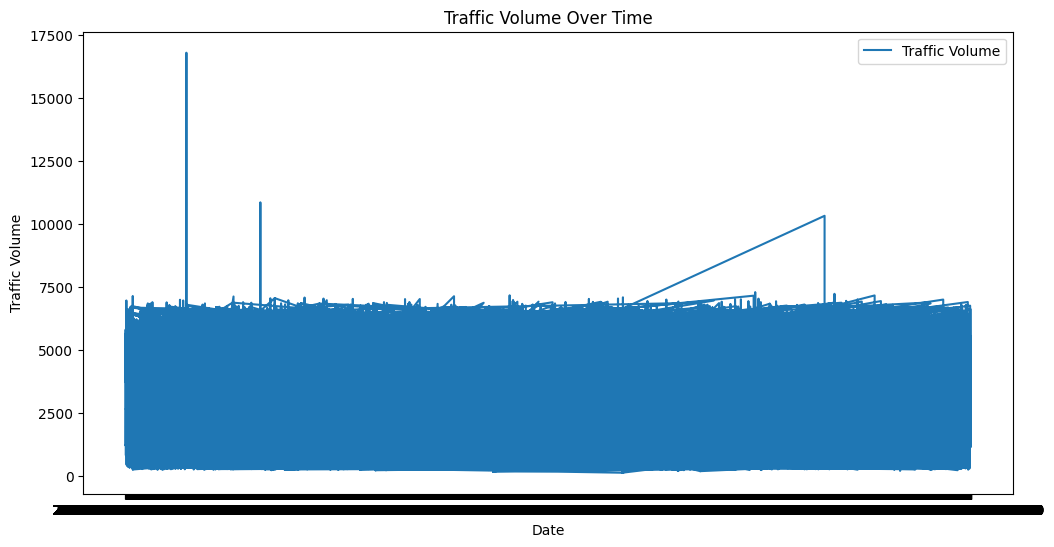

In [11]:
import matplotlib.pyplot as plt
data.set_index('date_time', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['traffic_volume'], label='Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Over Time')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['traffic_volume'], label='Time Series Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# it is done

"""from statsmodels.tsa.seasonal import seasonal_decompose
data.sort_index(inplace=True)


data['traffic_volume'].fillna(method='ffill', inplace=True)

decomposition = seasonal_decompose(data['traffic_volume'], model='additive', period=24*7)
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.title('Observed')
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()"""

"from statsmodels.tsa.seasonal import seasonal_decompose\ndata.sort_index(inplace=True)\n\n\ndata['traffic_volume'].fillna(method='ffill', inplace=True)  \n\ndecomposition = seasonal_decompose(data['traffic_volume'], model='additive', period=24*7) \nplt.figure(figsize=(14, 10))\nplt.subplot(4, 1, 1)\nplt.plot(decomposition.observed)\nplt.title('Observed')\nplt.subplot(4, 1, 2)\nplt.plot(decomposition.trend)\nplt.title('Trend')\nplt.subplot(4, 1, 3)\nplt.plot(decomposition.seasonal)\nplt.title('Seasonal')\nplt.subplot(4, 1, 4)\nplt.plot(decomposition.resid)\nplt.title('Residual')\nplt.tight_layout()\nplt.show()"

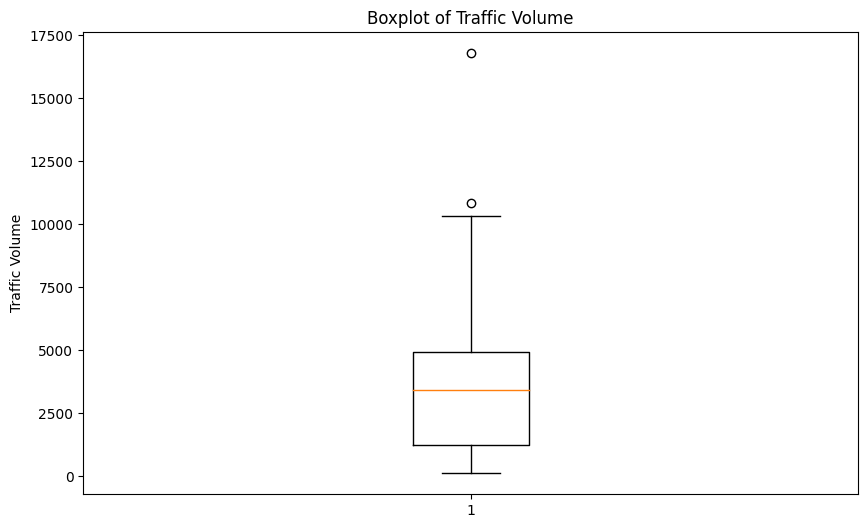

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['traffic_volume'])
plt.title('Boxplot of Traffic Volume')
plt.ylabel('Traffic Volume')
plt.show()


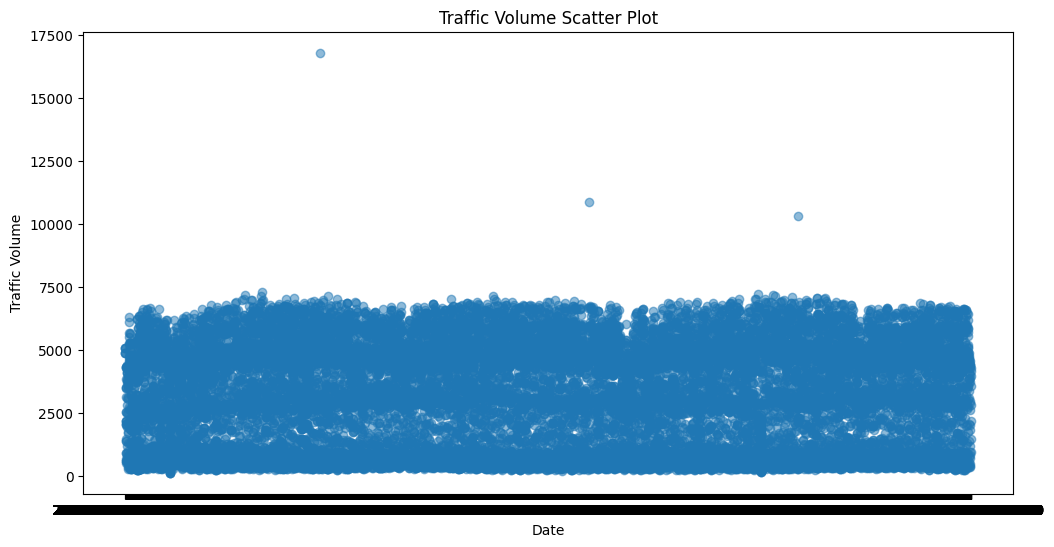

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['traffic_volume'], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Scatter Plot')
plt.show()


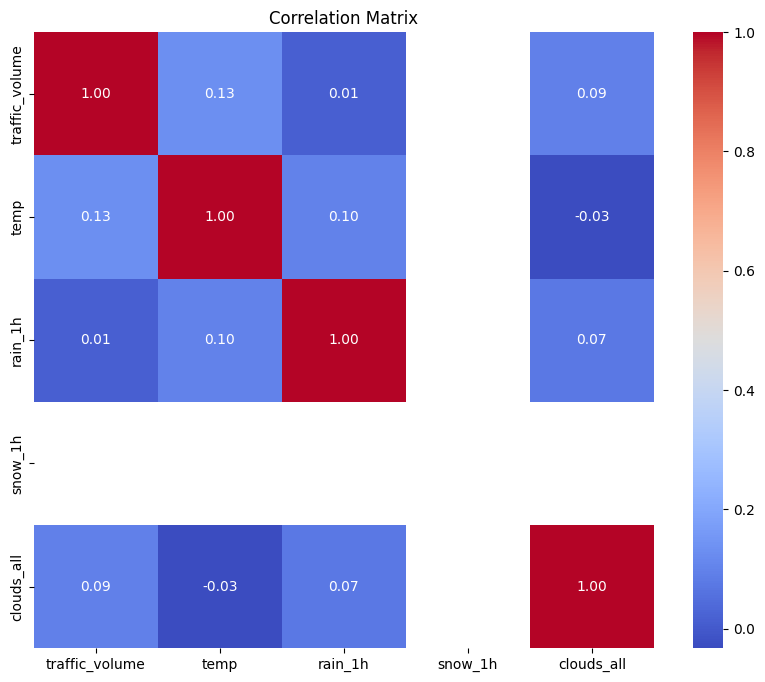

In [16]:
import seaborn as sns
correlation_matrix = data[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


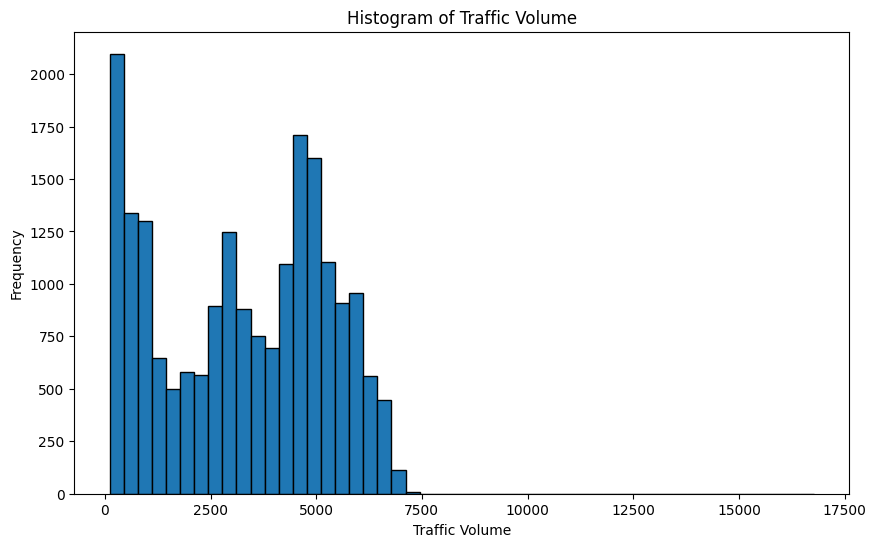

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(data['traffic_volume'], bins=50, edgecolor='k')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Histogram of Traffic Volume')
plt.show()


In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['traffic_volume'], model='additive', period=365)
result.plot()
plt.show()

ValueError: This function does not handle missing values

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'traffic_volume')

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [19]:
import pandas as pd
print(data.isnull().sum())


traffic_volume         0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
dtype: int64


In [24]:
data.index = pd.to_datetime(data.index)

In [25]:
data.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description'],
      dtype='object')

In [27]:

if not isinstance(data.index, pd.DatetimeIndex):

    data.set_index('time_column', inplace=True)

data.fillna(method='ffill', inplace=True)

<ipython-input-27-618ed25d3e24>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [28]:
for lag in range(1, 25):
    data[f'lag_{lag}'] = data['traffic_volume'].shift(lag)


In [29]:
data['moving_avg_3h'] = data['traffic_volume'].rolling(window=3).mean()
data['moving_avg_24h'] = data['traffic_volume'].rolling(window=24).mean()


In [30]:

data.sort_index(inplace=True)


In [31]:
data = pd.get_dummies(data, columns=['weather_main', 'weather_description'])


In [36]:
data.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9',
       'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16',
       'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22', 'lag_23',
       'lag_24', 'moving_avg_3h', 'moving_avg_24h', 'weather_main_Clear',
       'weather_main_Clouds', 'weather_main_Drizzle', 'weather_main_Fog',
       'weather_main_Haze', 'weather_main_Mist', 'weather_main_Rain',
       'weather_main_Smoke', 'weather_main_Snow', 'weather_main_Thunderstorm',
       'weather_description_Sky is Clear', 'weather_description_broken clouds',
       'weather_description_drizzle', 'weather_description_few clouds',
       'weather_description_fog', 'weather_description_freezing rain',
       'weather_description_haze',
       'weather_description_heavy intensity drizzle',
       'weather_description_heavy intensity rain',
       'weather_description_h

In [38]:

data.sort_index(inplace=True)


In [39]:

columns_to_drop = [
    'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'lag_1',
    'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9',
    'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16',
    'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22', 'lag_23',
    'lag_24', 'moving_avg_3h', 'moving_avg_24h', 'weather_main_Clear',
    'weather_main_Clouds', 'weather_main_Drizzle', 'weather_main_Fog',
    'weather_main_Haze', 'weather_main_Mist', 'weather_main_Rain',
    'weather_main_Smoke', 'weather_main_Snow', 'weather_main_Thunderstorm',
    'weather_description_Sky is Clear', 'weather_description_broken clouds',
    'weather_description_drizzle', 'weather_description_few clouds',
    'weather_description_fog', 'weather_description_freezing rain',
    'weather_description_haze',
    'weather_description_heavy intensity drizzle',
    'weather_description_heavy intensity rain',
    'weather_description_heavy snow',
    'weather_description_light intensity drizzle',
    'weather_description_light intensity shower rain',
    'weather_description_light rain',
    'weather_description_light rain and snow',
    'weather_description_light shower snow',
    'weather_description_light snow', 'weather_description_mist',
    'weather_description_moderate rain',
    'weather_description_overcast clouds',
    'weather_description_proximity shower rain',
    'weather_description_proximity thunderstorm',
    'weather_description_proximity thunderstorm with drizzle',
    'weather_description_proximity thunderstorm with rain',
    'weather_description_scattered clouds',
    'weather_description_shower drizzle',
    'weather_description_sky is clear', 'weather_description_sleet',
    'weather_description_smoke', 'weather_description_snow',
    'weather_description_thunderstorm',
    'weather_description_thunderstorm with heavy rain',
    'weather_description_thunderstorm with light drizzle',
    'weather_description_thunderstorm with light rain',
    'weather_description_thunderstorm with rain'
]

data.drop(columns=columns_to_drop, inplace=True)


In [40]:
print(data.head())
print(data.columns)


                     traffic_volume
date_time                          
2016-11-18 15:00:00          4872.0
2016-11-18 15:00:00          4872.0
2016-11-18 15:00:00          4872.0
2016-11-18 16:00:00          5074.0
2016-11-18 16:00:00          5074.0
Index(['traffic_volume'], dtype='object')


In [33]:
print(data.head())
print(data.describe())
print(data.info())


                     traffic_volume    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                                   
2016-11-18 15:00:00          4872.0  274.08      0.0      0.0          90   
2016-11-18 15:00:00          4872.0  274.08      0.0      0.0          90   
2016-11-18 15:00:00          4872.0  274.08      0.0      0.0          90   
2016-11-18 16:00:00          5074.0  273.84      0.0      0.0          90   
2016-11-18 16:00:00          5074.0  273.84      0.0      0.0          90   

                      lag_1   lag_2   lag_3   lag_4  lag_5  ...  \
date_time                                                   ...   
2016-11-18 15:00:00     NaN     NaN     NaN     NaN    NaN  ...   
2016-11-18 15:00:00  4872.0     NaN     NaN     NaN    NaN  ...   
2016-11-18 15:00:00  4872.0  4872.0     NaN     NaN    NaN  ...   
2016-11-18 16:00:00  4872.0  4872.0  4872.0     NaN    NaN  ...   
2016-11-18 16:00:00  5074.0  4872.0  4872.0  4872.0    NaN

In [34]:
print(data.head())
print(data.describe())
print(data.info())


                     traffic_volume    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                                   
2016-11-18 15:00:00          4872.0  274.08      0.0      0.0          90   
2016-11-18 15:00:00          4872.0  274.08      0.0      0.0          90   
2016-11-18 15:00:00          4872.0  274.08      0.0      0.0          90   
2016-11-18 16:00:00          5074.0  273.84      0.0      0.0          90   
2016-11-18 16:00:00          5074.0  273.84      0.0      0.0          90   

                      lag_1   lag_2   lag_3   lag_4  lag_5  ...  \
date_time                                                   ...   
2016-11-18 15:00:00     NaN     NaN     NaN     NaN    NaN  ...   
2016-11-18 15:00:00  4872.0     NaN     NaN     NaN    NaN  ...   
2016-11-18 15:00:00  4872.0  4872.0     NaN     NaN    NaN  ...   
2016-11-18 16:00:00  4872.0  4872.0  4872.0     NaN    NaN  ...   
2016-11-18 16:00:00  5074.0  4872.0  4872.0  4872.0    NaN

In [35]:
data

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,lag_1,lag_2,lag_3,lag_4,lag_5,...,weather_description_shower drizzle,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain
date_time,,,,,,,,,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,4872.0,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,4872.0,4872.0,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,4872.0,4872.0,4872.0,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,5074.0,4872.0,4872.0,4872.0,NaN,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,3947.0,4132.0,4283.0,4302.0,4302.0,...,False,False,False,False,False,False,False,False,False,False
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,3543.0,3947.0,4132.0,4283.0,4302.0,...,False,False,False,False,False,False,False,False,False,False
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,2781.0,3543.0,3947.0,4132.0,4283.0,...,False,False,False,False,False,False,False,False,False,False


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [43]:
import pandas as pd
data = data.reset_index()
data['date_time'] = pd.to_datetime(data['date_time'])
data['prev_traffic_volume'] = data['traffic_volume'].shift(1)
data['traffic_volume_diff'] = data['traffic_volume'].diff()
data['day_of_week'] = data['date_time'].dt.dayofweek
data['month'] = data['date_time'].dt.month
data['day_of_year'] = data['date_time'].dt.dayofyear


print(data.head())
print(data.columns)

            date_time  traffic_volume  prev_traffic_volume  \
0 2016-11-18 15:00:00          4872.0                  NaN   
1 2016-11-18 15:00:00          4872.0               4872.0   
2 2016-11-18 15:00:00          4872.0               4872.0   
3 2016-11-18 16:00:00          5074.0               4872.0   
4 2016-11-18 16:00:00          5074.0               5074.0   

   traffic_volume_diff  day_of_week  month  day_of_year  
0                  NaN            4     11          323  
1                  0.0            4     11          323  
2                  0.0            4     11          323  
3                202.0            4     11          323  
4                  0.0            4     11          323  
Index(['date_time', 'traffic_volume', 'prev_traffic_volume',
       'traffic_volume_diff', 'day_of_week', 'month', 'day_of_year'],
      dtype='object')


In [44]:
data

,date_time,traffic_volume,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
0,2016-11-18 15:00:00,4872.0,NaN,NaN,4,11,323
1,2016-11-18 15:00:00,4872.0,4872.0,0.0,4,11,323
2,2016-11-18 15:00:00,4872.0,4872.0,0.0,4,11,323
3,2016-11-18 16:00:00,5074.0,4872.0,202.0,4,11,323
4,2016-11-18 16:00:00,5074.0,5074.0,0.0,4,11,323
...,...,...,...,...,...,...,...
19995,2018-09-30 19:00:00,3543.0,3947.0,-404.0,6,9,273
19996,2018-09-30 20:00:00,2781.0,3543.0,-762.0,6,9,273
19997,2018-09-30 21:00:00,2159.0,2781.0,-622.0,6,9,273
19998,2018-09-30 22:00:00,1450.0,2159.0,-709.0,6,9,273


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [46]:

data = data.sort_values(by='date_time')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam


data = data.reset_index(drop=True)
data['date_time'] = pd.to_datetime(data['date_time'])
data['prev_traffic_volume'] = data['traffic_volume'].shift(1)
data['traffic_volume_diff'] = data['traffic_volume'].diff()
data['day_of_week'] = data['date_time'].dt.dayofweek
data['month'] = data['date_time'].dt.month
data['day_of_year'] = data['date_time'].dt.dayofyear

train_size = 0.8
split_index = int(len(data) * train_size)
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [52]:

print("Original columns:", data.columns)

data = data.reset_index(drop=True)

print("Columns after reset:", data.columns)


Original columns: Index(['level_0', 'index', 'date_time', 'traffic_volume',
       'prev_traffic_volume', 'traffic_volume_diff', 'day_of_week', 'month',
       'day_of_year'],
      dtype='object')
Columns after reset: Index(['level_0', 'index', 'date_time', 'traffic_volume',
       'prev_traffic_volume', 'traffic_volume_diff', 'day_of_week', 'month',
       'day_of_year'],
      dtype='object')


In [54]:

X_train_numerical = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numerical = X_test.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_numerical.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_numerical.columns, index=X_test.index)

print(f"Scaled training data shape: {X_train_scaled_df.shape}")
print(f"Scaled testing data shape: {X_test_scaled_df.shape}")


Scaled training data shape: (15999, 4)
Scaled testing data shape: (4000, 4)


In [ ]:

X_train = train_data.drop(columns='traffic_volume')
y_train = train_data['traffic_volume']
X_test = test_data.drop(columns='traffic_volume')
y_test = test_data['traffic_volume']


X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_test = X_test.dropna()
y_test = y_test[X_test.index]

numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_train_numerical = X_train[numerical_cols]
X_test_numerical = X_test[numerical_cols]
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)
X_train['date_time_numeric'] = X_train['date_time'].astype(np.int64) // 10**9  # Convert to Unix timestamp
X_test['date_time_numeric'] = X_test['date_time'].astype(np.int64) // 10**9
X_train = X_train.drop(columns=['date_time'])
X_test = X_test.drop(columns=['date_time'])
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train = pd.concat([X_train.drop(columns=numerical_cols), X_train_scaled_df], axis=1)
X_test = pd.concat([X_test.drop(columns=numerical_cols), X_test_scaled_df], axis=1)
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)
        y.append(target.iloc[i+seq_length])
    return np.array(X), np.array(y)


sequence_length = 24


X_train_seq, y_train_seq = create_sequences(X_train, y_train, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, sequence_length)


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [64]:
X_train

,day_of_week,month,day_of_year,level_0,index,prev_traffic_volume,traffic_volume_diff
0,4,11,323,-1.731943,-1.731943,NaN,NaN
1,4,11,323,-1.731726,-1.731726,0.809910,0.260712
2,4,11,323,-1.731509,-1.731509,0.911700,0.000278
3,4,11,323,-1.731293,-1.731293,0.911700,0.000278
4,4,11,323,-1.731076,-1.731076,0.911700,-0.961522
...,...,...,...,...,...,...,...
15993,4,5,138,1.731076,1.731076,0.088816,-0.315595
15994,4,5,138,1.731293,1.731293,-0.034642,-0.603103
15995,4,5,138,1.731509,1.731509,-0.270472,0.000278
15996,4,5,138,1.731726,1.731726,-0.270472,-1.200039


# LSTM

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [65]:

model = Sequential([
    Input(shape=(sequence_length, X_train_seq.shape[2])),
    LSTM(50, activation='tanh'),
    Dense(1)
])

# Compile
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

history = model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_split=0.1)

loss = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {loss}")

y_pred = model.predict(X_test_seq)
print(f"Predictions shape: {y_pred.shape}")


Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 14598848.0000 - val_loss: 14522181.0000
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - loss: 14643800.0000 - val_loss: 14367830.0000
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 14083973.0000 - val_loss: 14220619.0000
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 13993344.0000 - val_loss: 14076884.0000
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 13807467.0000 - val_loss: 13935403.0000
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 13631720.0000 - val_loss: 13795474.0000
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 13532649.0000 - val_loss: 13657346.0000
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 13368594.0000 - val_loss: 13520394.0000
Epoch 9/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 13339955.0000 - val_loss: 13384608.0000
Epoch 10/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 13141190.0000 - val_loss:

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 14646677.0000
Test Loss: 14774909.0
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
MAE: 3312.748114072101
MSE: 14774907.14686841
RMSE: 3843.814140520898
MAPE: 98.56232794495814%


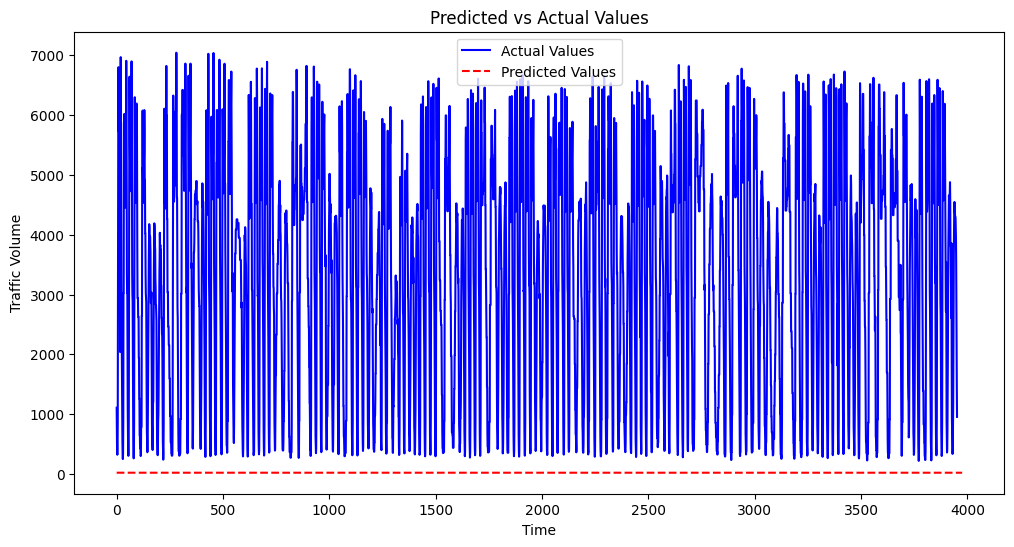

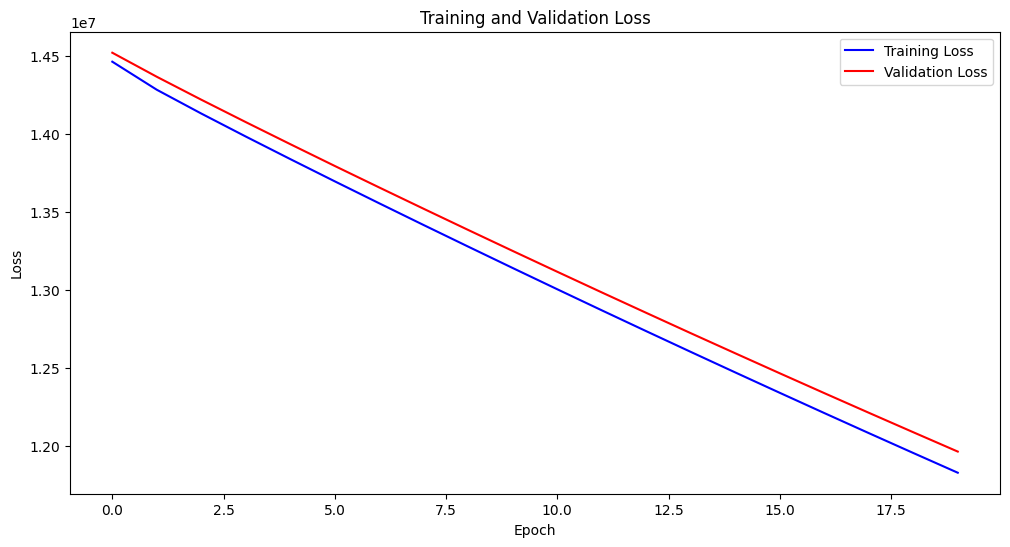

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam




### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
# Evaluate
loss = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {loss}")

#  predictions
y_pred = model.predict(X_test_seq)



### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

MAE: 1953.708698479942
MSE: 5064066.918943138
RMSE: 2250.3481772701616
MAPE: 120.19909414151371%


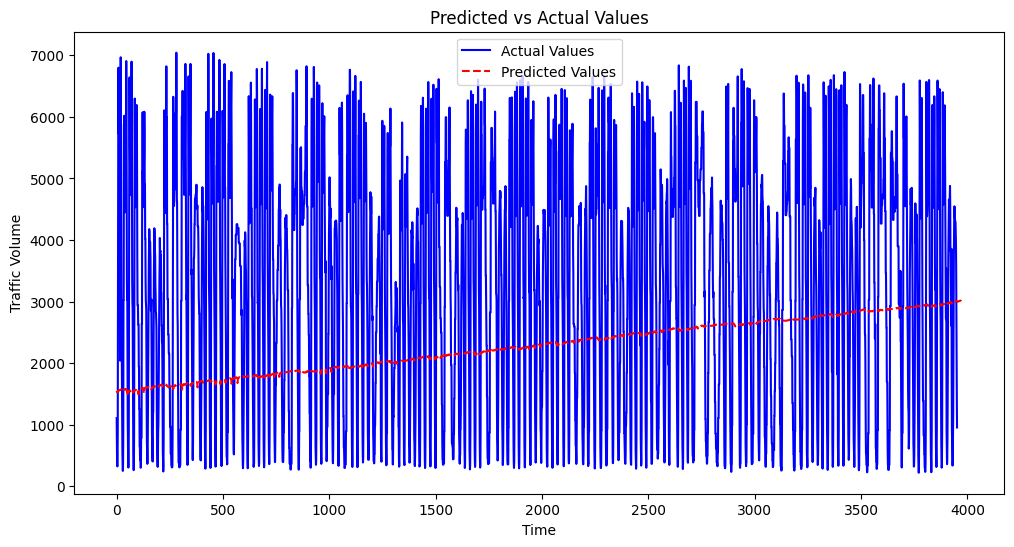

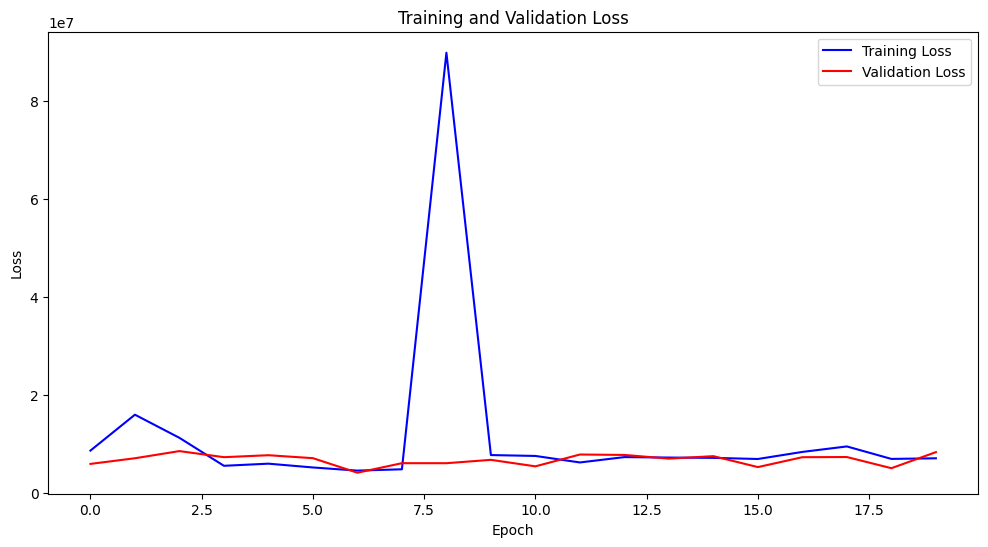

In [78]:

mae = mean_absolute_error(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_seq - y_pred) / y_test_seq)) * 100

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

y_pred_flat = y_pred.flatten()
y_test_seq_flat = y_test_seq[sequence_length:]
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq_flat, label='Actual Values', color='blue')
plt.plot(y_pred_flat, label='Predicted Values', color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - loss: 10959989.0000 - val_loss: 5959157.0000
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - loss: 14321050.0000 - val_loss: 7110221.0000
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 13393018.0000 - val_loss: 8569894.0000
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - loss: 5644699.5000 - val_loss: 7329659.5000
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 5578859.5000 - val_loss: 7728931.0000
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - loss: 5358046.5000 - val_loss: 7126382.5000
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - loss: 4827111.0000 - val_loss: 4158857.2500
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 4277053.5000 - val_loss: 6104467.0000
Epoch 9/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 26085568.0000 - val_loss: 6101194.0000
Epoch 10/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 8897238.0000 - val_loss: 6784999.

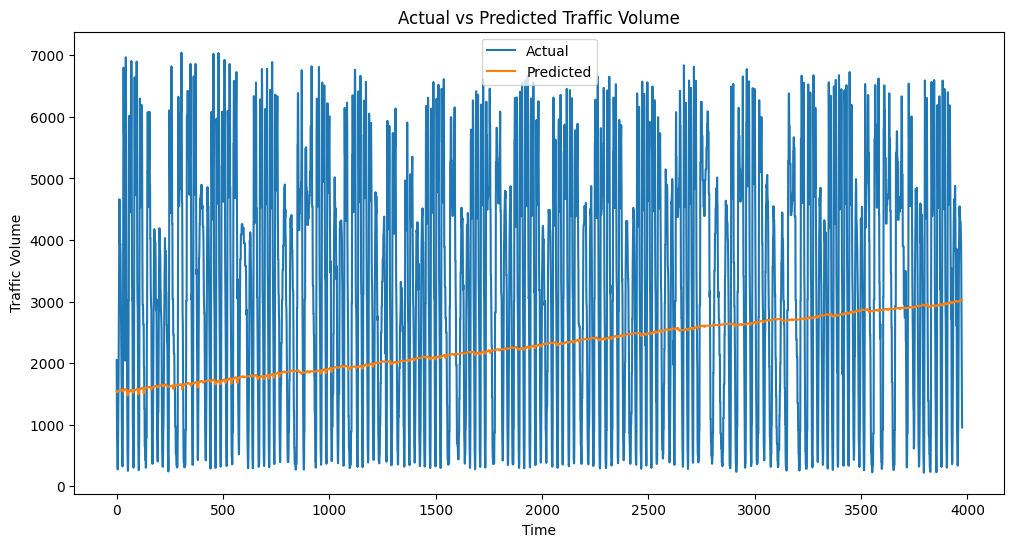

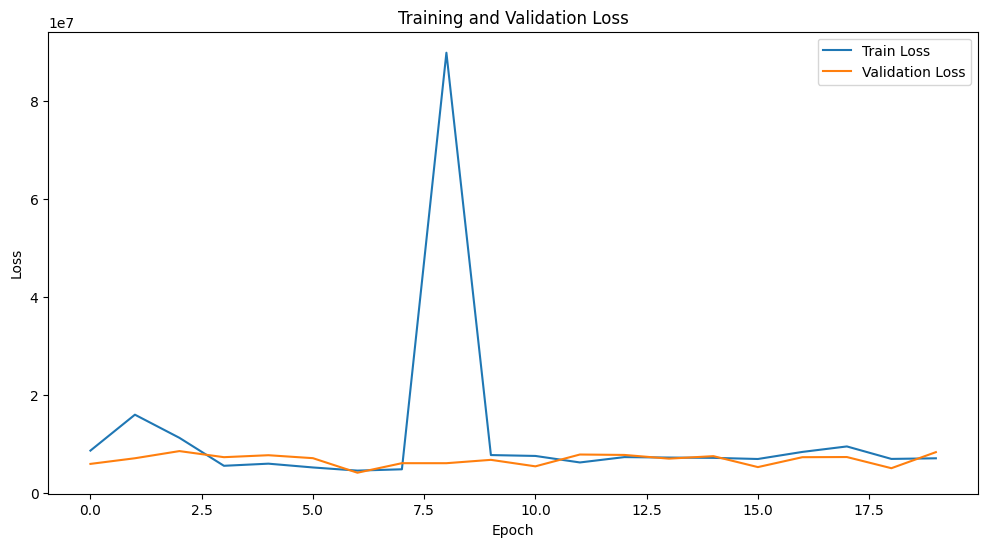

In [69]:
## build lstm in deffrent way
# Build the LSTM model
model = Sequential([
    Input(shape=(sequence_length, X_train_seq.shape[2])),
    LSTM(50, activation='relu', return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train
history = model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate
loss = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {loss}")

#  predictions
y_pred = model.predict(X_test_seq)

# Calculate
mae = mean_absolute_error(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_seq - y_pred.flatten()) / y_test_seq)) * 100

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_seq, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# GRU

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - loss: 21964512.0000 - val_loss: 8293594.0000
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 9303503.0000 - val_loss: 8197843.5000
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 7057211.5000 - val_loss: 7603240.5000
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - loss: 7607701.5000 - val_loss: 7264056.0000
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 34s 33ms/step - loss: 7052586.5000 - val_loss: 7482912.5000
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - loss: 6978556.5000 - val_loss: 7514896.5000
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 7088583.0000 - val_loss: 7388198.5000
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - loss: 7085365.0000 - val_loss: 7512553.5000
Epoch 9/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - loss: 7128135.5000 - val_loss: 7398532.5000
Epoch 10/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 6937969.0000 - val_loss: 7466927.500

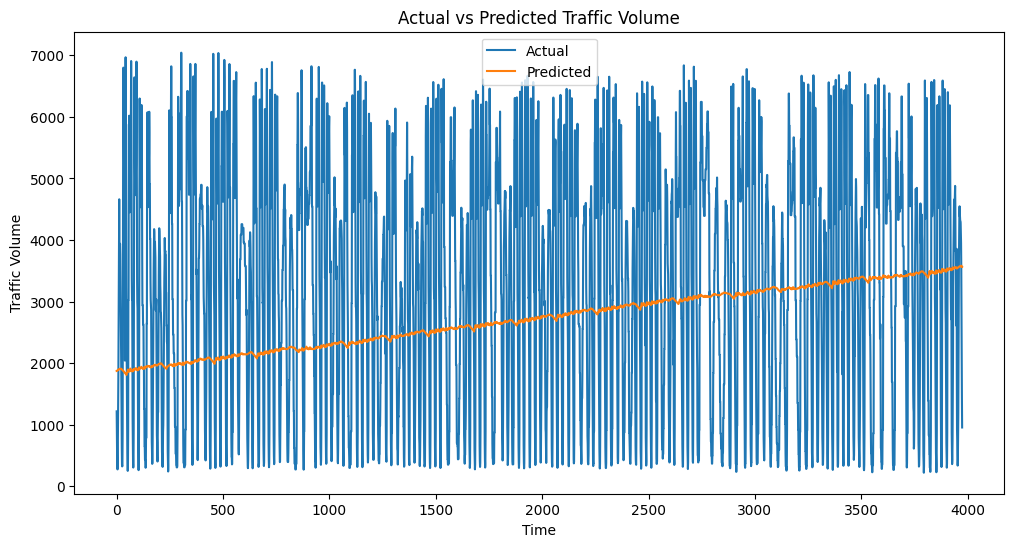

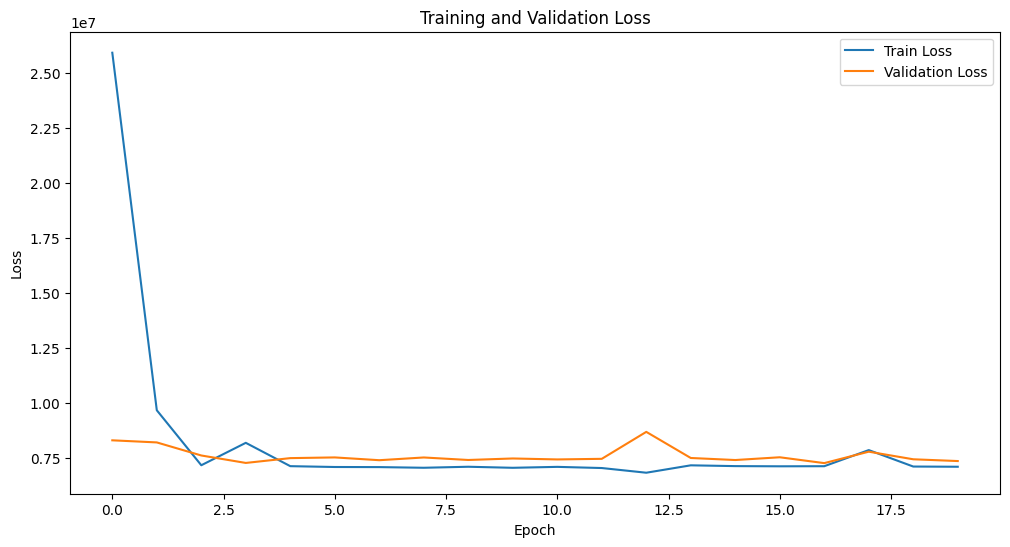

In [79]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
model = Sequential([
    Input(shape=(sequence_length, X_train_seq.shape[2])),
    GRU(50, activation='relu', return_sequences=True),
    GRU(50, activation='relu'),
    Dense(1)
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

history = model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
loss = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {loss}")


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [80]:
y_pred = model.predict(X_test_seq)



125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

MAE: 1828.7882334659985
MSE: 4394853.903164344
RMSE: 2096.3906847637786
MAPE: 137.7684540463077%


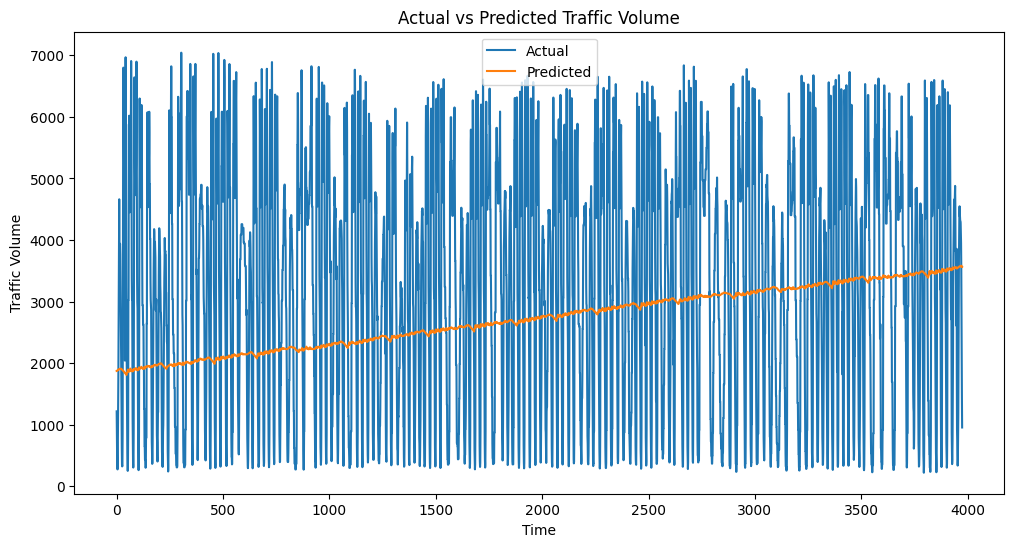

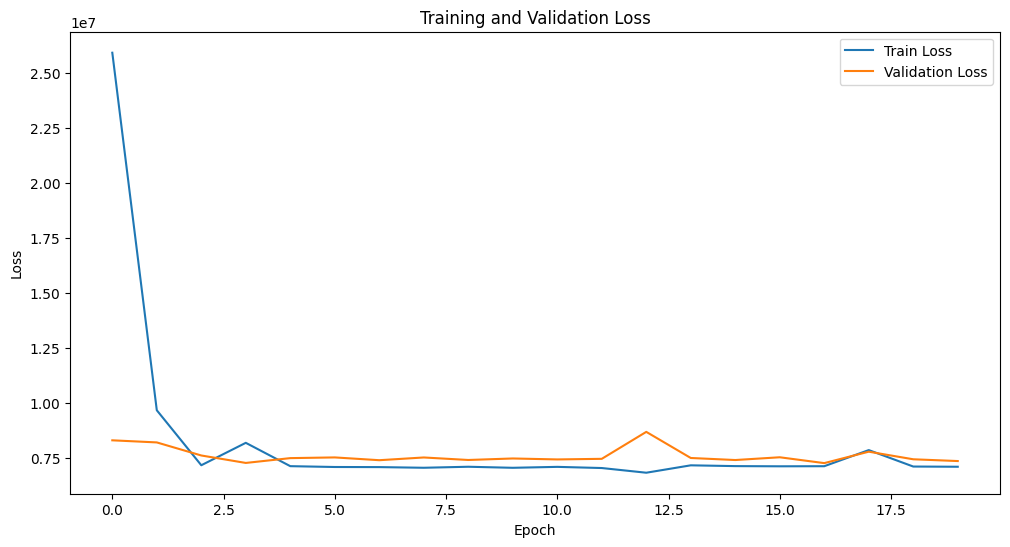

In [81]:
mae = mean_absolute_error(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_seq - y_pred.flatten()) / y_test_seq)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: